# Informe sobre patrones de éxito y de consumo de videojuegos

Para la tienda online de videojuegos Ice se analizarán datos históricos referentes a la venta de videojuegos, se pretende identificar patrones que determinen el éxito de un juego, y comprender los hábitos de consumo de los principales perfiles de compradores, para poder detectar proyectos prometedores y planificar campañas publicitarias.

A continuación se enlistas los distintos apartados del reporte:
* 1 - Carga de archivo e inspección inicial de información
* 2 - Preparación de los datos
* 3 - Análisis de los datos
* 4 - Perfiles de usuario por región
* 5 - Pruebas de hipótesis
* 6 - Conclusiones generales

## Carga de archivo e inspección inicial de información

Antes que nada se cargarán las librerías a ser utilizadas, posteriormente, se realizará la carga del documento donde se encuentran los datos a ser trabajados y se obtendrá la información de esta misma para comenzar tener una idea sobre cómo será necesario limpiar la información.

In [1]:
#Importación de librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
#Importación del archivo csv

data = pd.read_csv('/datasets/games.csv')

In [3]:
#Obtención de información referente a la base
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


De acuerdo con la información provista por Ice la información anterior obtiene la siguiente descripción:

* Name (Nombre)
* Platform (Plataforma)
* Year_of_Release (Año de lanzamiento)
* Genre (Género)
* NA_sales (ventas en Norteamérica en millones de dólares estadounidenses)
* EU_sales (ventas en Europa en millones de dólares estadounidenses)
* JP_sales (ventas en Japón en millones de dólares estadounidenses)
* Other_sales (ventas en otros países en millones de dólares estadounidenses)
* Critic_Score (máximo de 100)
* User_Score (máximo de 10)
* Clasificación (ESRB)

Además, Ice menciona que los datos de 2016, los de nuestro interés para esta práctica pueden estar incompletos, por lo que se considerarán una muestra y no la población.

Podemos concluir de este primer apartado que en efecto hay problemas con la base que necesitan tratarse:

* Valores ausentes en 6 columnas, de las cuales destacan 2 a las que sólo les hacen falta dos registros.
* Columnas con el tipo incorrecto, como Year que debería se un entero en lugar de float y user_score que debería ser float, no string.
* Nombres de las columas a ser sustituidos por cadenas de puras minúsculas.


Igualmente será necesario verificar valores únicos de las columnas para asegurar que no existen distintos nombres que hagan referencia a una misma cualidad.

## Preparación de los datos

Procederemos incialmente con los puntos ya mencionados en el apartado anterior: cambiar nombres de columnas, estudiar valores únicados, cambiar tipos y tratar valores ausentes. Posteriormente obtendremos una nueva columna para el análisis de la información, la cual concentrará las ventas totales en todas las regiones.

Iniciaremos con el cambio de nombre para las columnas:

In [4]:
#Cambio de nombre columnas de data

data.columns = ['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating']
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Ahora analizaremos los valores únicos de las columnas:

In [5]:
#Analizar valores únicos en columnas

for column in data.columns:
    try:
        print(sorted(data[column].unique()))
    except:
        print(data[column].unique())
    print()

['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']

['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG', 'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP', 'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360', 'XB', 'XOne']

[1980.0, 1981.0, 1982.0, 1983.0, 1984.0, 1985.0, 1986.0, 1987.0, 1988.0, 1989.0, 1990.0, 1991.0, 1992.0, 1993.0, 1994.0, 1995.0, 1996.0, 1997.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0, 2016.0, nan]

['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]

[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34,

Podemos confirmar que no parecen existir errores de captura en cuanto a duplicidad de categorías, lo cual significaría que se usó algún formulario preconfigurado para la captura de la información.

A continuación procederemos con el primer cambio de tipo.

Comenzando por la columna de user_score, dado que es tipo object no podremos hacer muchos cálculos con los datos, por lo que primero debemos cambiarla a float, y para que esto se nos permita 'tbd' será transformado a np.nan; para nuestros fines y buscando tener la mayor cantidad de datos posible, tanto los valores realmente ausentes como los por determinarse contarán como ausentes.

In [6]:
#Cambiar valores por determinar a ausentes y tipo

data.loc[data['user_score']=='tbd',['user_score']]=np.nan
data['user_score']=data['user_score'].astype('float')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


Para poder cambiar el tipo de la columna de año de lanzamiento será necesario tener todos los valores ya que int no acepta valores tipo nan. Para poder alcanzar este objetivo se eliminarán los datos faltantes, ya que una estimación del año de lanzaminto no será muy precisa y puede afectar considerablemente los resultados.

In [7]:
#Eliminamos registros con años vacíos

data = data.loc[pd.isna(data['year_of_release'])==False].copy()


In [8]:
#Convertimos la columna en el tipo de datos int, más acorde con sus valores

data['year_of_release']=data['year_of_release'].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Ya que las columnas se encuentran en su tipo correcto procederemos a atender el resto de los valores ausentes. Dados los 2 que faltan tanto para nombre como para género, comenzaremos analizando estos.

In [9]:
data.loc[(pd.isna(data['name']))|(pd.isna(data['genre']))]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Podemos comprobar que para estos dos registros faltan tanto los datos de nombre como los de género, así como muchos otros. Dado lo poco útil de la información y al ser un número considerablemente pequeño dentro del volumen de registros, procederemos a omitirlos en un nuevo dataframe data_clean.

In [10]:
data_clean = data.loc[pd.isna(data['name'])==False].copy()
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


A continuación, procederemos a crear una nueva columna donde se totalicen las ventas de todas las regiones. Lo cual brindará información muy valiosa sobre el éxito de los distintos juegos.

In [11]:
#Creación de la nueva columna total_sales

data_clean['total_sales']=data[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)
data_clean.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [12]:
#Creación de una nueva columna group_sales

def group_total(row):
    lower= int(row['total_sales']/10)*10
    upper= int(row['total_sales']/10)*10+10
    return f'{lower}-{upper}'



In [13]:
data_clean['group_total'] = data_clean.apply(group_total,axis=1).copy()
data_clean.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,group_total
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54,80-90
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24,40-50
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52,30-40
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77,30-40
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38,30-40


Y para tratar la información relacionada con las calificaciones de profesionales y usuarios, procederemos a identificar como nan los valores que permanecen ausentes, ya que estimarlos puede resultar impresiso, especialmente por el gran volumen de estos faltantes y su importancia en este estuido.

In [14]:
#Llenar valores de critic_score y user_score

data_clean['critic_score'] = data_clean['critic_score'].fillna(float('nan'))
data_clean['user_score'] = data_clean['user_score'].fillna(float('nan'))
data_clean.info()
data_clean.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
 11  total_sales      16444 non-null  float64
 12  group_total      16444 non-null  object 
dtypes: float64(7), int64(1), object(5)
memory usage: 1.8+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,group_total
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54,80-90
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24,40-50
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52,30-40
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77,30-40
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38,30-40
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26,30-40
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80,20-30
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91,20-30
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32,20-30
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31,20-30


Ahora, para tratar los datos ausentes en la columna rating se cambiarán su leyenda a 'unknown' ya que no podemos hacer una mejor estimación sobre sus datos, considerando que la región y la consola pueden afectar en esta clasificación, y cualquier estimación podría modificar considerablemente los resultados.

In [15]:
#Cambio a 'unknown' de valores ausentes de rating

data_clean['rating']=data_clean['rating'].fillna('unknown')
data_clean.info()
data_clean.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
 12  group_total      16444 non-null  object 
dtypes: float64(7), int64(1), object(5)
memory usage: 1.8+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,group_total
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54,80-90
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24,40-50
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52,30-40
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77,30-40
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38,30-40
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,unknown,30.26,30-40
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80,20-30
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91,20-30
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32,20-30
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,unknown,28.31,20-30


Así es como terminamos teniendo los datos con los que procederemos a una segunda etapa de análisis después de una limpieza y corrección de datos que permitió eliminar los menos registros posibles, los cuales no contaban con la información relevante para el estudio. Conservamos prácticamente la totalidad de los datos, eliminando únicamente 2 de lo 16715 originales.

## Análisis de los datos

A continuación procederemos a un análisis más profundo que nos permitirá conservar los datos más relevantes para nuestras conclusiones. Comenzaremos analizando lo significativo de los datos por año y por plataforma, descartando los casos que no lo son. Posteriormente elegiremos los años y plataformas a trabajar para dar paso a un próximo bloque de análisis.

In [16]:
#Análisis significativo años
año_significativo = data_clean.pivot_table(index='year_of_release', values='platform', aggfunc='count')
print(año_significativo)
print()
#Análisis significativo plataforma
plataforma_significativa = data_clean.pivot_table(index='platform', values='year_of_release', aggfunc='count')
print(plataforma_significativa)


                 platform
year_of_release          
1980                    9
1981                   46
1982                   36
1983                   17
1984                   14
1985                   14
1986                   21
1987                   16
1988                   15
1989                   17
1990                   16
1991                   41
1992                   43
1993                   60
1994                  121
1995                  219
1996                  263
1997                  289
1998                  379
1999                  338
2000                  350
2001                  482
2002                  829
2003                  775
2004                  762
2005                  939
2006                 1006
2007                 1197
2008                 1427
2009                 1426
2010                 1255
2011                 1136
2012                  653
2013                  544
2014                  581
2015                  606
2016        

Considerando que para que un grupo sea significativo debe tener al menos 50 casos, eliminaremos todos los años que cumplen con esta característica y la plataforma GEN.

In [17]:
#Filtrado de casos no significativos

año_no_sig = año_significativo.loc[año_significativo['platform']<51].index
plataforma_no_sig = plataforma_significativa.loc[plataforma_significativa['year_of_release']<51].index


data_filtered = data_clean.query('(platform not in @plataforma_no_sig) and (year_of_release not in @año_no_sig)')
data_filtered.info()
data_filtered.head(20)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16090 entries, 0 to 16714
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16090 non-null  object 
 1   platform         16090 non-null  object 
 2   year_of_release  16090 non-null  int64  
 3   genre            16090 non-null  object 
 4   na_sales         16090 non-null  float64
 5   eu_sales         16090 non-null  float64
 6   jp_sales         16090 non-null  float64
 7   other_sales      16090 non-null  float64
 8   critic_score     7980 non-null   float64
 9   user_score       7460 non-null   float64
 10  rating           16090 non-null  object 
 11  total_sales      16090 non-null  float64
 12  group_total      16090 non-null  object 
dtypes: float64(7), int64(1), object(5)
memory usage: 1.7+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,group_total
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54,80-90
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52,30-40
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77,30-40
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38,30-40
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80,20-30
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91,20-30
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32,20-30
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,unknown,24.67,20-30
11,Mario Kart DS,DS,2005,Racing,9.71,7.47,4.13,1.90,91.0,8.6,E,23.21,20-30
12,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,unknown,23.09,20-30


Ahora analizaremos las ventas totales por plataforma, para encontrar las más relevantes del mercado así como su comportamiento ordinario.

In [18]:
#Valoración de ventas totales por plataforma

platform_ev = data_filtered.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values('total_sales')
platform_ev

,total_sales
platform,
NES,3.72
DC,15.95
SAT,33.59
PSV,53.81
WiiU,82.19
SNES,124.69
GB,152.08
XOne,159.32
GC,196.73


A partir de las 7 plataformas más exitosas crearemos una lista y analizaremos sus niveles de ventas a través de los años.

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4']


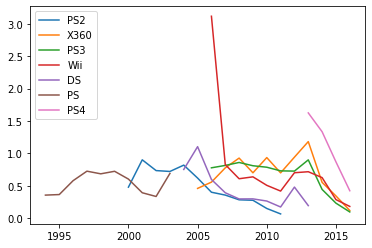

In [19]:
#Creación de lista de plataformas más populares
platform_ev_df = platform_ev.reset_index()
platform_ev_df.columns=['platform','total_sales']
platform_ev_plt = [platform_ev_df['platform'].iloc[-1],platform_ev_df['platform'].iloc[-2],platform_ev_df['platform'].iloc[-3],
                  platform_ev_df['platform'].iloc[-4],platform_ev_df['platform'].iloc[-5],platform_ev_df['platform'].iloc[-6],
                  platform_ev_df['platform'].iloc[-7],]
print(platform_ev_plt)
data_filtered2 = data_filtered.query('platform in @platform_ev_plt')

for platform in platform_ev_plt:
    data_for_plot=data_filtered2.query('platform == @platform')
    data_for_plot2=data_for_plot.pivot_table(index='year_of_release')
    plt.plot(data_for_plot2.index,data_for_plot2['total_sales'],label=platform)

plt.legend()
plt.show()

Podemos observar con la gráfica anteriore que las plataformas tienen una vida de alrededor de los 10 años, con una marcada disminución a partir de al rededor de los 8 años y con el surgimiento de la siguiente generación (claramente ejemplificado por la familia playstation) alrededor del quinto o sexto año de que surgió la anterior.Con esta información igualmente se evidencia claramente que las consolas de la geneación anterior están en su último año de vida, por lo que no convendría invertrir más en la publicidad de estas, sino a las que actualmente están cumpliendo sus 4 años aproximadamente.

A partir de aquí se considerará para el estudio únicamente las consolas que llegaron a tener ventas en 2015, ya que aunque algunas ya no estarán vigentes para 2017, marcan las tendencias en géneros de años recientes y un comportamiento más similar al mercado actual que el de consolas anteriores. Para esto obtendremos primero la lista de las consolas que estuvieron activas en 2015.

In [20]:
#Obtención de lista de plataformas activas en 2015

alive=data_filtered.query('year_of_release >= 2015')['platform'].unique()
alive

array(['PS4', 'XOne', '3DS', 'WiiU', 'PS3', 'X360', 'PC', 'Wii', 'PSV',
       'PSP'], dtype=object)

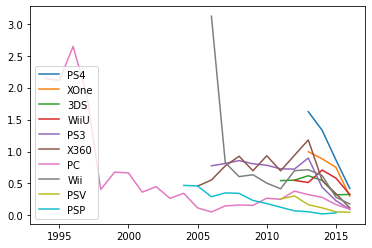

In [21]:
#Filtrado de plataformas de interés
data_filtered = data_filtered.query('platform in @alive')

#Grafica de plataformas de interés
for platform in alive:
    data_for_plot=data_filtered.query('platform == @platform')
    data_for_plot2=data_for_plot.pivot_table(index='year_of_release')
    plt.plot(data_for_plot2.index,data_for_plot2['total_sales'],label=platform)

plt.legend()
plt.show()

Con la gráfica anterior podemos observar que los juegos para computadora tienen muchos más años a la venta y que debemos limitar también los años de estudio para nuestro análisis. A continuación se filtratá a partir de 2011 donde coexisten plataformas de nuestro interés para el estudio, y donde puede existir un mercado similar dado el corto periodo de tiempo.

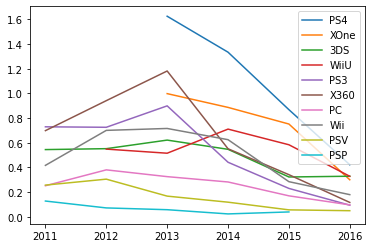

In [22]:
#Filtrado por año y gráfica

data_filtered = data_filtered.query('year_of_release >= 2011')

for platform in alive:
    data_for_plot=data_filtered.query('platform == @platform')
    data_for_plot2=data_for_plot.pivot_table(index='year_of_release')
    plt.plot(data_for_plot2.index,data_for_plot2['total_sales'],label=platform)

plt.legend()
plt.show()

Es relevante considerar que en general la tendencia es negativa para las ventas de todas las consolas a excepción del 3DS, el cual parece estar teniendo un resurgimiento. A continuación obtendremos un diagrama de caja para cada consola para evaluar sus igresos respecto a los juegos e identificar valores atípicos, por lo pronto el pico que muestra el wii en un inicio es bastante desconcertante.

          total_sales
platform             
3DS               512
PC                389
PS3               708
PS4               392
PSP               312
PSV               429
Wii               197
WiiU              147
X360              498
XOne              247


<AxesSubplot:xlabel='platform', ylabel='total_sales'>

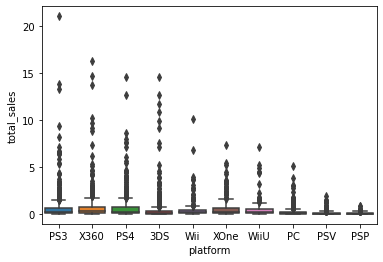

In [23]:
#Creación de diagramas de caja
print(data_filtered.pivot_table(index='platform', values='total_sales', aggfunc='count'))

sns.boxplot(x='platform', y='total_sales', data=data_filtered)

Podemos observar que los valores atípicos son una norma en la venta de juegos más que una excepción, todas las consolas los tienen, especialmente el Wii, el X360 y el PS3 que además coinciden en tiempos; sin embargo con el propósito de contar con un mejor estudio de los juegos en general procederemos a omitir los valores atípicos por plataforma durante el resto del ejercicio. Igualmente es importante notar que por la cantidad de juegos por plataforma, al ser más de 50, son todas significativas.

<AxesSubplot:xlabel='platform', ylabel='total_sales'>

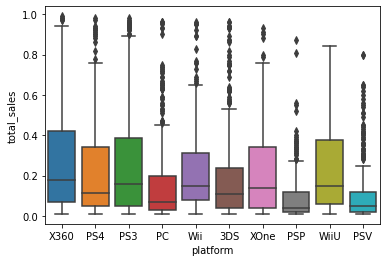

In [24]:
#Limpiar los atípicos
data_filtered2 = data_filtered[data_filtered['total_sales'] <= (data_filtered['total_sales'].describe()['75%']+1.5*(data_filtered['total_sales'].describe()['75%']-data_filtered['total_sales'].describe()['25%']))]

#Obtener diagrama de caja nuevamente
sns.boxplot(x='platform', y='total_sales', data=data_filtered2)

Con los datos más limpios podemos observar que las medianas de ventas entre las distintas plataformas no distan demasiado unas de otras, siendo las excepciones la computadora y los portátiles.

Ahora para comprender el efecto de reseñas clientes y de profesionales, procederemos a estudiar su impacto sobre los juegos de la plataforma PS3, la cual cuenta con la mayor cantidad de entradas, haciendola un candidato revelador sobre la situación; esto lo haremos  a través de un gráfico de dispersión para ambos casos.

<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

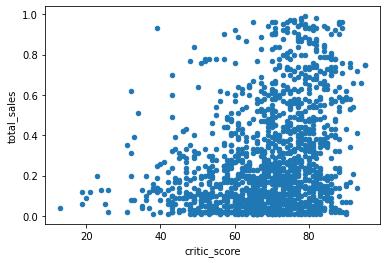

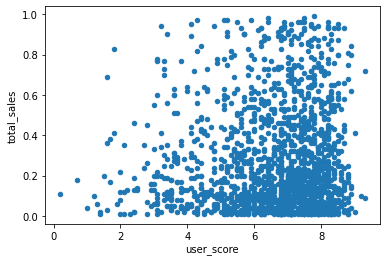

In [25]:
#Obtención de gráficos de dispersión     
data_filtered2.plot(y='total_sales', x='critic_score', kind='scatter')
data_filtered2.plot(y='total_sales', x='user_score', kind='scatter')

Podemos encontrar una clara tendencia del impacto de las reseñas sobre las ventas totales del juego, teniendo un efecto más claro con las reseñas profesionales a partir de alrrededor del 6.5 de calificación. Procedamos a estudiar las correlaciones para ver más claramente su efecto, considerando que estas no son perfectamente lineales, sino que tienen una tendencia a incrementarse significativamente al acrcarse al 10, por lo que utilizaremos el método spearman.

In [29]:
#Obtener correlaciones

data_filtered2[['critic_score','user_score','total_sales']].corr('spearman')

,critic_score,user_score,total_sales
critic_score,1.000000,0.522022,0.279322
user_score,0.522022,1.000000,0.045108
total_sales,0.279322,0.045108,1.000000


En efecto observamos una correlación positiva en ambos tipos de reseñas, pero teniendo la reseña profesional mucho más impacto que la reseña de los usuarios, lo cual es de esperarse por el público y la plataforma con que cuentan los profesionales. Esto mismo vuelve muy relevante el acercarse y proporcionar a los profesionales copias de los juegos, para elevar las ventas.

Finalmente procederemos a realizar una comparación de las ventas de los jugos respecto a su género, para esto se creará nuevamente un grupo de gráficos de caja, para poder observar claramente sus medianas, límites y valores atípicos.

<AxesSubplot:xlabel='genre', ylabel='total_sales'>

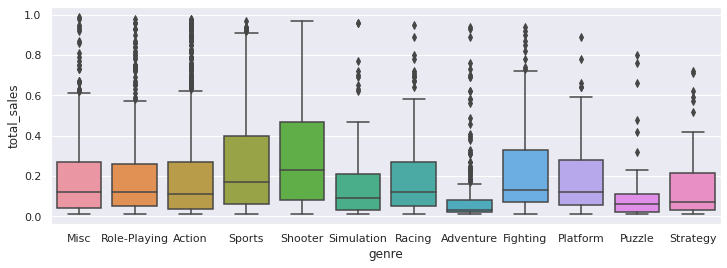

In [30]:
#Obtener diagrama de caja por gérero
sns.set(rc={"figure.figsize":(12, 4)})
sns.boxplot(x='genre', y='total_sales', data=data_filtered2)

Indudablemente los juegos de "shooter" son los más exitosos, teniendo tanto su mediana, como su tercer cuartil, como su límite superior, considerablemente más altos que el resto, seguido por los juegos de plataforma, deportes, carreras y peleas, para los que su tercer cuartil supera los 0.4. Mientras que los juegos de ropecabezas y aventura destacan por su baja popularidad.

## Perfiles de usuario por región

A continuación estudiaremos más especificamente a cada región: NA (Norte América), UE (Unión Europea) y JP (Japón).
Esto lo haremos con el propósito de saber cómo debe orientarse el presupuesto de publicidad en cada área, variando por consola, género e influencia de las clasificaciones sobre el público objetivo correspondiente.

Comenzaremos, utilizando la información tan filtrada como la tenemos ahora, para identificar los niveles de venta de las distintas consolas expluyendo portátiles y pc, las cuales ya observamos tienen un impacto menor.

In [31]:
#Conjunto de datos para análisis
platforms_reduced = ['PS4','PS3','Wii','WiiU','X360','XOne']
data_filtered3 = data_filtered2.query('platform in @platforms_reduced')

  platform  eu_sales  jp_sales  na_sales
0     WiiU     10.43      3.35     14.62
1      Wii     11.04      6.45     20.60
2      PS4     27.98      8.43     24.00
3     XOne     14.86      0.07     25.59
4      PS3     45.45     32.21     58.63
5     X360     34.11      1.73     63.76


<AxesSubplot:title={'center':'Grouped by region'}, xlabel='platform'>

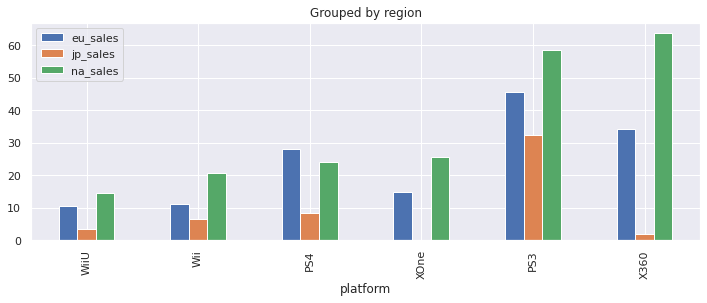

In [32]:
#Tabla pivote y gráfica por consola
pivot_console = data_filtered3.pivot_table(index='platform', values=['na_sales','eu_sales','jp_sales'], aggfunc='sum').sort_values('na_sales').reset_index()
print(pivot_console)
pivot_console.plot(x='platform',
            kind='bar',
            stacked=False,
            title='Grouped by region')

Claramente se observa cómo el mercado estadounidense es el más fuerte y Japón el más pequeño, esto último directamente ligado con la población de la región. Sin embargo, resalta el desinterés de los japoneses por las consolas de xbox, las únicas externas a Japón en el estudio, tienendo PlayStation la preferencia de los japoneses tanto en la nueva generación de consolas como en la anterior. Un efecto similar se visualiza con el peso de Xbox en Norte América, siendo la consola local, pero su diferencia no es demasiada respecto a las consolas niponas, especialmente en la nuva generación. Europa por su parte tiene una clara preferencia por la PlayStation en ambas generaciones.

A continuación presentaremos una nueva gráfica para que quede ejemplificada más claramente la división del mercado.

<AxesSubplot:title={'center':'Stacked Bar Graph'}, ylabel='platform'>

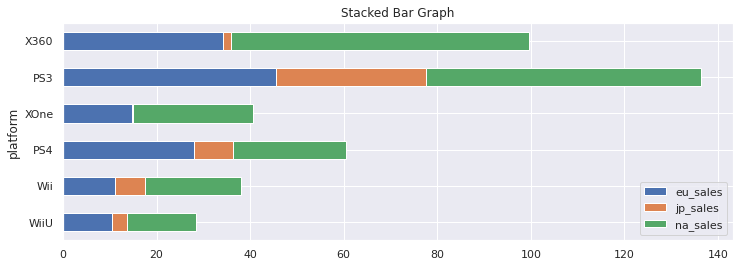

In [33]:
#Creación de segunda gráfica
pivot_console.plot(
    x = 'platform',
    kind = 'barh',
    stacked = True,
    title = 'Stacked Bar Graph',
    )

Ahora, por región, estudiaremos las preferencias por género de una manera similar.

           genre  eu_sales  jp_sales  na_sales
0         Puzzle      0.02      0.73      0.15
1       Strategy      1.13      1.19      1.68
2     Simulation      2.51      1.00      3.54
3       Platform      4.37      0.26      5.35
4      Adventure      6.06      2.12      7.50
5         Racing     12.41      0.34      9.81
6       Fighting      6.32      5.36     10.89
7   Role-Playing      9.45     11.20     14.93
8        Shooter     19.02      2.39     24.78
9           Misc     12.38      4.13     26.73
10        Sports     19.84      4.36     34.39
11        Action     50.36     19.16     67.45


<AxesSubplot:title={'center':'Grouped by region'}, xlabel='genre'>

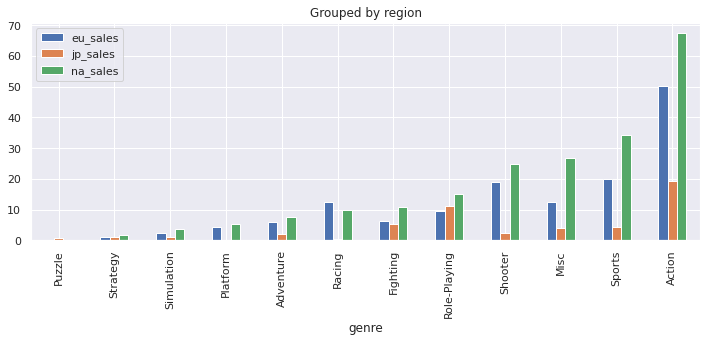

In [34]:
#Tabla pivote y gráfico por género por región
pivot_console = data_filtered3.pivot_table(index='genre', values=['na_sales','eu_sales','jp_sales'], aggfunc='sum').sort_values('na_sales').reset_index()
print(pivot_console)
pivot_console.plot(x='genre',
            kind='bar',
            stacked=False,
            title='Grouped by region')

In [35]:
#5 Géneros favoritos por región
regions = ['eu_sales','jp_sales','na_sales']
for region in regions:
    print(str(region))
    top5 = pivot_console.sort_values(region, ascending=False)
    print(top5[['genre',region]].head())

eu_sales
      genre  eu_sales
11   Action     50.36
10   Sports     19.84
8   Shooter     19.02
5    Racing     12.41
9      Misc     12.38
jp_sales
           genre  jp_sales
11        Action     19.16
7   Role-Playing     11.20
6       Fighting      5.36
10        Sports      4.36
9           Misc      4.13
na_sales
           genre  na_sales
11        Action     67.45
10        Sports     34.39
9           Misc     26.73
8        Shooter     24.78
7   Role-Playing     14.93


Claramente existe una afición general entre los jugadores, independientemente de la región, por los jugos de acción, teniendo un primer lugar indiscutido, pro a partir del segundo lugar comienzan a surgir las diferencias. Entre Norte América y Europa las preferencias se siguen pareciendo bastante únicamente diferenciandose por el orden inverso del tercer y cuárto género preferido. Por el otro lado japón se diferencia no sólo en orden, sino también en géneros presentes, teniendo los juegos de rol un papel relevante en el segundo lugar, y los juegos de peleas el cuarto; dejando fuera del top a los juegos de carreras y disparos, y haciendo de los juegos de deportes el 5to favorito en lugar del segundo.

Finalmente observemos si las clasificaciones de ESRB tienen un impacto sobre las ventas en las distintas regiones. 

  rating  eu_sales  jp_sales  na_sales
0      T     24.48     13.28     37.64
1      E     25.30      3.42     40.15
2   E10+     28.56      1.26     43.43
3      M     34.72      7.37     50.18


<AxesSubplot:title={'center':'Grouped by region'}, xlabel='rating'>

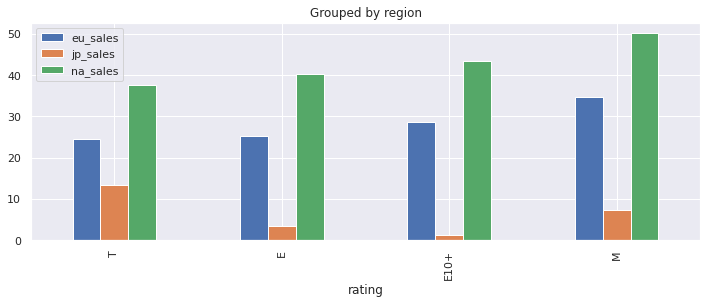

In [36]:
#Tabla pivote y gráfico por clasificación por región
rat=['EC','E','E10+','T','M']
pivot_rating = data_filtered3.query('rating in @rat').pivot_table(index='rating', values=['na_sales','eu_sales','jp_sales'], aggfunc='sum').sort_values('na_sales').reset_index()
print(pivot_rating)
pivot_rating.plot(x='rating',
            kind='bar',
            stacked=False,
            title='Grouped by region')

Al igual que con los géneros de los juegos, ante las clasificaciones tanto Norte América como Europa se compartan de manera semejante, mientras Japón se comporta de una manera distinta. En Japón destaca un aprecio por los juegos para adolecentes, seguidos en un lejano segundo lugar que representa menos de la mitad que el primero, se encuentran los juegos para adultos, quedando los juegos para todo público e infantiles claramente rezagados. Por el otro lado aunque las ventas de juegos para adolecentes son las más altas en Europa, estas no distan tanto del primer lugar norteamericano, los juegos para todo público. En estas últimas regiones los juegos para los más grandes y los más chicos son los menos populares. Esto puede estar directamente relacionado con la cultura de los hobbies de las distintas regiones, teniendo a Japón como una rgión donde este tipo de entretenimiento sigue siendo muy popular entre los adultos, mientras que en Estados Unidos se observa como una actividad de niños y adolecentes.

## Pruebas de hipótesis

A continuación probaremos las siguientes **hipótesis**:
* Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
* Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

Para estas pruebas estaremos considerando las siguientes **hipótesis nulas** respectivamente:
* Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
* Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.

A estas hipótesis nulas se llegó dado que son aquellas que cuentan con una igualdad en su enunciado, provocando las siguientes **hipótesis alternativas**:
* Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes.
* Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

Consideraremos en ambos casos un alpha, nivel de significancia (alfa), de 0.05, así como un análisis de dos colas ya que no se está estudiando ni valores sobre o por debajo de ningún otro, simplemente la diferencia.

Comenzando por la primera, que evalúa la igualdad de las medias de las calificaciones de los usuarios de XBox One y PC. En este caso no consideraremos que las poblaciones sean iguales, ya que los precios de las plataformas son distintos y las edades y nivel de ingreso del público objetivo puede ser considerablemente distinto.

In [40]:
#Primero obtengamos los grupos de valores e identifiquemos a través de la prueba bartlett si las poblaciones son iguales.

users_XOne = data_filtered2.query('platform == "XOne"')
users_PC = data_filtered2.query('platform == "PC"')

stat, p = st.bartlett(users_XOne.dropna()['user_score'], users_PC.dropna()['user_score'])
p

0.12268251760367097

La prueba de Bartlett cuenta con la hipótesis nula de que las poblacioines son iguales, al no poder rechazarse (dado el alto nivel sobre alpha), consideraremos esta variable como cierta en el análisis de la hipóteis.

In [41]:
#Análicemos si se rechaza la hipótesis nula considerando nuestras variables

alpha = 0.05 # el nivel de significancia estadística crítica
# si el valor p es menor que alfa, rechazamos la hipótesis

resultados = st.ttest_ind(users_XOne.dropna()['user_score'], users_PC.dropna()['user_score'],equal_var = True)


print('p-value: ', resultados.pvalue)

if resultados.pvalue < alpha:
     print("Rechazamos la hipótesis nula.")
else:
     print("No podemos rechazar la hipótesis nula.") 

p-value:  0.7358234145202169
No podemos rechazar la hipótesis nula.


No se termina rechazando la hipótesis nula, indicando que la media de las calificaciones de usuarios para las distintas plataformas indicando que en efecto podría darse el caso de que sean las mismas, informándonos sobre semejanzas de público y creiterio que generan comportamientos comparables, y destacando la posibilidad de utilizar estrategias de publicidad semejantes para los usuarios de distintas consolas.

Ahora, consideraremos la segunda hipotesis sobre las medias de calificaciones entre juegos de acción y de deportes; en este caso, sí consideraremos poblaciones similares, ya que en general a través de todas las consolas es público de todas las edades el adepto a estas categorías, no existiendo gran diferencia entre las poblaciones.

In [42]:
#Primero obtengamos los grupos de valores e identifiquemos a través de la prueba bartlett si las poblaciones son iguales.

users_acc = data_filtered3.query('genre == "Action"')
users_spr = data_filtered3.query('genre == "Sports"')

stat, q = st.bartlett(users_acc.dropna()['user_score'], users_spr.dropna()['user_score'])
q

0.019581252872179218

En este caso al ser p un valor menor al valor de significancia terminamos considerando que las poblaciones son distintas.

In [45]:
#Análicemos si se rechaza la hipótesis nula considerando nuestras variables

alpha = 0.05 # el nivel de significancia estadística crítica
# si el valor p es menor que alfa, rechazamos la hipótesis

resultados = st.ttest_ind(users_acc.dropna()['user_score'], users_spr.dropna()['user_score'], equal_var = False)

print('p-value: ', resultados.pvalue)

if resultados.pvalue < alpha:
    print("Rechazamos la hipótesis nula.")
else:
    print("No podemos rechazar la hipótesis nula.") 

p-value:  1.982472836962846e-07
Rechazamos la hipótesis nula.


En este caso encontramos que la hipótesis nula se rechaza, destacando una diferencia entre las calificaciones de los usuarios de los distintos generos, igualmente denotando que el acercamiento publicitario debe ser distinto en cuanto a géneros.

## Conclusiones generales

Se tuvo que realizar una limpieza y preprocesamiento de datos bastante sencillos, esto debido seguramente a una correcta configuración de un formulario de captura y de programas de recopilación de datos de las ventas de los distintos juegos. Principalmente se cambiaron los nombres de las columnas que traían mayúsculas y los tipos de algunas como el año, que funcionaba mejor como un entero y se igualó el formato de las calificaciones de usuarios y profesionales para hacerlas comparables. Únicamente se eliminaron registros que no contaban con calificación o ingresos, siendo estos aspectos muy relevantes para el presente estudio, pero su cantidad fue tan limitada que resultaba despreciable y no alteraba considerablemente los resultados. Además de esto, en la etapa inicial de preprocesamiento se colocó *unknown* a las clasificaciones ESRB que no se encontraban registradas en sistema para eliminar los menos datos posibles, y siendo esta columna relevante, pero secundaria en el estudio.

En el análisis observamos la existencia de valores atípicos, los cuales fueron eliminados como consecuencia de su bajo volumen y el impacto provocado en la información, tras esta eliminación las distribuciones de los datos pudieron apreciarse mucho más dado que los valores atípicos eran considerablemente elevados. Aquí pudo apreciarse una distribución similar entre las distintas consolas, sobresaliendo en sus valores aquellas de la generación que está por desaparecer, lo cual es lógico ya que están terminando su periodo de vida y ya realizaron casi todas sus ventas en una sociedad cada vez más adepta a este hobby.

Posteriormente se analizó el perfil de los jugadores entre las distintas regiones demostrando similitudes de preferencia entre Europa y Norte América, demostrando una clara diferencia con el mercado Japones; sin embargo, en todos los casos, los juegos de acción resultaron los predilectos.

Finalmente se probaron las hipótesis de diferencia en las calificaciones de usuario respecto a plataforma y género con hipótsis nulas de igualdad. El resultado de esto fue que no existe una clara diferencia entre las medias de PC y XBox, pero sí entre las de acción y deportes, evidenciando la necesidad de campañas enfocadas a los distintos géneros, más no consolas.

Podemos concluir que la diferencia entre los grupos de jugadores por plataforma, región y género varía significativamente, teniendo su principal diferenciador entre oriente y occidente; remarcando la importancia de campañas publicitaras distintas, enfocadas y estudiadas para cada tipo de juego y región. En este análisis se pudieron observar las principales categorías de diferenciación y su impacto, aunque es posible profundizar en el estudio de estos mismos con la base de información presentada.